# Implementation of Bagging using Random Forest

## Holiday Package Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

### Handling Missing Values

1. Handling Missing Values.
2. Handling Duplicates.
3. Check data type.
4. Understand the dataset.

In [3]:
## Checking for missing values
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
## Check all categorties
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [6]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [7]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [9]:
## Check Missing Values
### These are the features with nan value

features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5),  ' % missing values')

Age 4.62357  % missing values
TypeofContact 0.51146  % missing values
DurationOfPitch 5.13502  % missing values
NumberOfFollowups 0.92062  % missing values
PreferredPropertyStar 0.53191  % missing values
NumberOfTrips 2.86416  % missing values
NumberOfChildrenVisiting 1.35025  % missing values
MonthlyIncome 4.76678  % missing values


In [10]:
# Statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values

1. Impute Median value for Age column.
2. Impute Mode for Type of Contract.
3. Impute Median for Duration of Pitch.
4. Impute Mode for NumberofFollowup as it is Discreate feature.
5. Impute Mode for PreferredPropertyStart.
6. Impute Median for NumberofTrips.
7. Impute Mode for NumberOfChildrenVisiting.
8. Impute Median for MonthlyIncome.

In [11]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStart
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [12]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5),  ' % missing values')

Age 0.0  % missing values
TypeofContact 0.0  % missing values
DurationOfPitch 0.0  % missing values
NumberOfFollowups 0.0  % missing values
PreferredPropertyStar 0.0  % missing values
NumberOfTrips 0.0  % missing values
NumberOfChildrenVisiting 0.0  % missing values
MonthlyIncome 0.0  % missing values


In [13]:
df.drop('CustomerID', axis=1, inplace=True)

In [14]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Enginnering
### Feature Extraction

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [16]:
# Create new column for feature
df['TotalVisits'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [17]:
# Get all the numeric features
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numeric features: ', len(numeric_features))

Number of numeric features:  12


In [18]:
# Get all the categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical features: ', len(categorical_features))

Number of categorical features:  6


In [19]:
# Get all the discrete features
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print('Number of discrete features: ', len(discrete_features))

Number of discrete features:  9


## Train split and model training

In [20]:
## Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [21]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
# Separate the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [25]:
X_train = preprocessor.fit_transform(X_train)

In [26]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [27]:
X_test = preprocessor.transform(X_test)

In [28]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382


## Machine Learning Training

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
models = {
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f'{list(models.keys())[i]} Model Performance')

    print('Model performance on Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:4f}'.format(model_train_rocauc_score))

    print('--------------------------------------')

    print('Model performance on Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

AdaBoost Model Performance
Model performance on Training set
- Accuracy: 0.8565
- F1 Score: 0.8365
- Precision: 0.730769
- Recall: 0.364883
- ROC AUC Score: 0.667038
--------------------------------------
Model performance on Test set
- Accuracy: 0.8354
- F1 Score: 0.8115
- Precision: 0.6630
- Recall: 0.3194
- ROC AUC Score: 0.6400


Gradient Boosting Model Performance
Model performance on Training set
- Accuracy: 0.8939
- F1 Score: 0.8819
- Precision: 0.875598
- Recall: 0.502058
- ROC AUC Score: 0.742855
--------------------------------------
Model performance on Test set
- Accuracy: 0.8589
- F1 Score: 0.8398
- Precision: 0.7732
- Recall: 0.3927
- ROC AUC Score: 0.6824


Logistic Regression Model Performance
Model performance on Training set
- Accuracy: 0.8460
- F1 Score: 0.8202
- Precision: 0.701587
- Recall: 0.303155
- ROC AUC Score: 0.636802
--------------------------------------
Model performance on Test set
- Accuracy: 0.8364
- F1 Score: 0.8087
- Precision: 0.6914
- Recall: 0.293

## Hyperparameter tunning

In [46]:
rf_params = {
    'n_estimators': [50, 60, 70, 80, 90],
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_params = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'min_samples_split': [2, 3, 4, 5, 6],
    'n_estimators': [100, 200, 500],
    'criterion': ['friedman_mse', 'squared_error', 'mse'],
    'max_depth': [5, 8, 15, None, 10]
}

In [47]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('Adaboost', AdaBoostClassifier(), rf_params),
    ('Gradient Boosting', GradientBoostingClassifier(), gb_params)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1    
    )

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f'------------ Best Parameters for {model_name} ------------')
    print(model_param[model_name])
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=50; total time=   0.1s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.2s[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.2s

[CV] END .................algorithm=SAMME.R, n_estimators=50; total time=   0.2s


/home/diegoagd10/anaconda3/envs/default/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/diegoagd10/anaconda3/envs/default/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/diegoagd10/anaconda3/envs/default/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/diegoagd10/anaconda3/envs/default/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and w

[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=60; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END ...................algorithm=SAMME, n_estimators=80; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END .................algorithm=SAMME.R, n_estimators=70; total time=   0.2s
[CV] END ...................

In [49]:
models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=80, algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=500, min_samples_split=5, max_depth=10, loss='log_loss', criterion='friedman_mse'),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(f'{list(models.keys())[i]} Model Performance')

    print('Model performance on Training set')
    print('- Accuracy: {:.4f}'.format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:4f}'.format(model_train_rocauc_score))

    print('--------------------------------------')

    print('Model performance on Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

AdaBoost Model Performance
Model performance on Training set
- Accuracy: 0.8465
- F1 Score: 0.8132
- Precision: 0.769874
- Recall: 0.252401
- ROC AUC Score: 0.617555
--------------------------------------
Model performance on Test set
- Accuracy: 0.8364
- F1 Score: 0.7977
- Precision: 0.7818
- Recall: 0.2251
- ROC AUC Score: 0.6049


Gradient Boosting Model Performance
Model performance on Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.000000
- Recall: 1.000000
- ROC AUC Score: 1.000000
--------------------------------------
Model performance on Test set
- Accuracy: 0.9591
- F1 Score: 0.9577
- Precision: 0.9689
- Recall: 0.8168
- ROC AUC Score: 0.9052




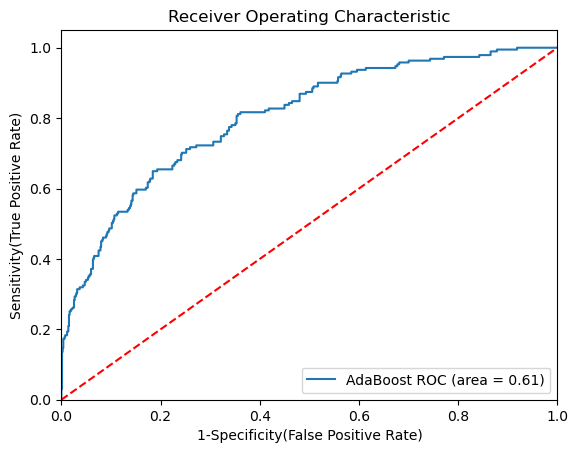

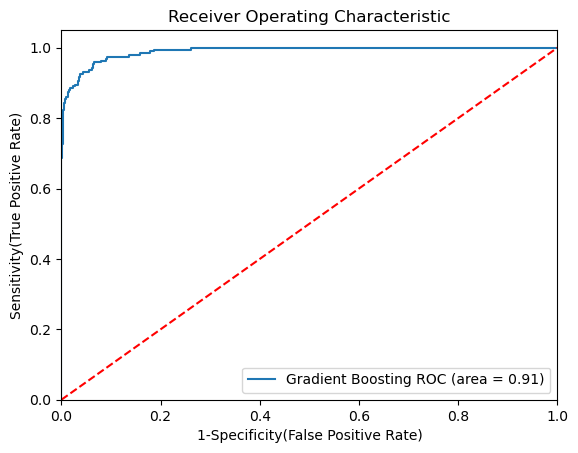

In [50]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'AdaBoost',
        'model': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME'),
        'auc': 0.6102
    },
    {
        'label': 'Gradient Boosting',
        'model': GradientBoostingClassifier(n_estimators=500, min_samples_split=5, max_depth=10, loss='log_loss', criterion='friedman_mse'),
        'auc': 0.9052
    }
]

# Create Loop through models to plot ROC curve
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    # Compute False positive rate, True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    # Custom settings for the plot
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('auc.png')
    plt.show()